In [11]:
dataset = "purchase100"
algorithm = "crown ibp"

### 1. Load Dataset

In [2]:
import numpy as np 
from art.utils import to_categorical

x = []
y = []

with open("data/dataset_purchase", "r") as f:
    for datapoint in f.readlines(): 
        split = datapoint.rstrip().split(",")
        label = int(split[0]) - 1
        x.append([int(s) for s in split[1:]])
        y.append(label)

x = np.array(x).astype(np.float32)
y = to_categorical(np.array(y), 100)

target_train_size = 10000
target_test_size = 10000
x_target_train = x[:target_train_size]
y_target_train = y[:target_train_size]
x_target_test = x[target_train_size:target_train_size+target_test_size]
y_target_test = y[target_train_size:target_train_size+target_test_size]

### 2. Define Target Model

In [15]:
from torch import nn
from torchsummary import summary
import math

def purchase_model(): 
    model = nn.Sequential(            
        nn.Linear(600, 128),
        nn.ReLU(),
        nn.Linear(128, 100)
    )
    return model

summary(purchase_model(), input_size=x_target_train[0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          76,928
              ReLU-2                  [-1, 128]               0
            Linear-3                  [-1, 100]          12,900
Total params: 89,828
Trainable params: 89,828
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.34
Estimated Total Size (MB): 0.35
----------------------------------------------------------------


### 3. Train Target Model

In [4]:
! python auto_LiRPA/examples/vision/purchase_training.py

INFO     10:29:32     Namespace(batch_size=64, bound_opts=None, bound_type='CROWN-IBP', clip_grad_norm=8.0, data='p100', device='cpu', eps=0.03137254901960784, load='', lr=0.0005, lr_decay_milestones=[70, 85], lr_decay_rate=0.1, model='purchase_model', no_loss_fusion=False, norm=2, num_epochs=100, scheduler_name='SmoothedScheduler', scheduler_opts='start=10,length=61,mid=0.4', seed=100, verify=False)
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
INFO     10:29:48     macs: 179200.0, params: 89828.0
INFO     10:29:48     Sequential(
  (0): Linear(in_features=600, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=100, bias=True)
)
INFO     10:29:48     Epoch 1, learning rate [0.0005]
INFO     10:29:49     [ 1:  50]: eps=0.00000000000

INFO     10:30:22     [11: 157]: eps=0.000000199850 CE=0.7500 Err=0.2484 Loss=0.7500 Robust_CE=0.7500 Verified_Err=0.2484 Time=0.0031
INFO     10:30:22     Epoch 12, learning rate [0.0005]
INFO     10:30:24     [12:  50]: eps=0.000000361538 CE=0.0000 grad_norm=2.7112 Loss=0.3787 Robust_CE=0.3787 Time=0.0118
INFO     10:30:24     [12: 100]: eps=0.000000605797 CE=0.0000 grad_norm=2.6609 Loss=0.3689 Robust_CE=0.3689 Time=0.0118
INFO     10:30:25     [12: 150]: eps=0.000000956866 CE=0.0000 grad_norm=2.7055 Loss=0.3688 Robust_CE=0.3688 Time=0.0118
INFO     10:30:25     [12: 157]: eps=0.000001016058 CE=0.0000 grad_norm=2.7074 Loss=0.3674 Robust_CE=0.3674 Time=0.0117
INFO     10:30:25     Epoch time: 3.0807, Total time: 21.9515
INFO     10:30:25     Evaluating...
INFO     10:30:27     [12: 157]: eps=0.000001016058 CE=0.7328 Err=0.2454 Loss=0.7329 Robust_CE=0.7329 Verified_Err=0.2454 Time=0.0030
INFO     10:30:27     Epoch 13, learning rate [0.0005]
INFO     10:30:29     [13:  50]: eps=0.00000

INFO     10:31:14     [22: 157]: eps=0.000360618305 CE=0.0000 grad_norm=1.6344 Loss=0.1284 Robust_CE=0.1284 Time=0.0117
INFO     10:31:14     Epoch time: 3.1355, Total time: 53.3268
INFO     10:31:14     Evaluating...
INFO     10:31:16     [22: 157]: eps=0.000360618305 CE=0.6469 Err=0.2410 Loss=0.6510 Robust_CE=0.6510 Verified_Err=0.2426 Time=0.0030
INFO     10:31:16     Epoch 23, learning rate [0.0005]
INFO     10:31:17     [23:  50]: eps=0.000397294216 CE=0.0000 grad_norm=1.4817 Loss=0.1160 Robust_CE=0.1160 Time=0.0122
INFO     10:31:18     [23: 100]: eps=0.000436698994 CE=0.0000 grad_norm=1.4708 Loss=0.1152 Robust_CE=0.1152 Time=0.0119
INFO     10:31:19     [23: 150]: eps=0.000478964756 CE=0.0000 grad_norm=1.5021 Loss=0.1165 Robust_CE=0.1165 Time=0.0120
INFO     10:31:19     [23: 157]: eps=0.000485117929 CE=0.0000 grad_norm=1.5113 Loss=0.1164 Robust_CE=0.1164 Time=0.0119
INFO     10:31:19     Epoch time: 3.1892, Total time: 56.5160
INFO     10:31:19     Evaluating...
INFO     10:31:

INFO     10:32:11     [33: 100]: eps=0.003944779537 CE=0.0000 grad_norm=0.7796 Loss=0.0477 Robust_CE=0.0477 Time=0.0121
INFO     10:32:12     [33: 150]: eps=0.004161773858 CE=0.0000 grad_norm=0.7894 Loss=0.0480 Robust_CE=0.0480 Time=0.0120
INFO     10:32:12     [33: 157]: eps=0.004192852446 CE=0.0000 grad_norm=0.7946 Loss=0.0480 Robust_CE=0.0480 Time=0.0120
INFO     10:32:12     Epoch time: 3.2434, Total time: 90.4088
INFO     10:32:12     Evaluating...
INFO     10:32:14     [33: 157]: eps=0.004192852446 CE=0.6632 Err=0.2450 Loss=0.7224 Robust_CE=0.7224 Verified_Err=0.2674 Time=0.0031
INFO     10:32:14     Epoch 34, learning rate [0.0005]
INFO     10:32:16     [34:  50]: eps=0.004419933528 CE=0.0000 grad_norm=0.7289 Loss=0.0431 Robust_CE=0.0431 Time=0.0121
INFO     10:32:16     [34: 100]: eps=0.004653590872 CE=0.0000 grad_norm=0.7212 Loss=0.0433 Robust_CE=0.0433 Time=0.0120
INFO     10:32:17     [34: 150]: eps=0.004887557230 CE=0.0000 grad_norm=0.7269 Loss=0.0439 Robust_CE=0.0439 Time=

INFO     10:33:11     [44:  50]: eps=0.011766168172 CE=0.0000 grad_norm=0.4859 Loss=0.0243 Robust_CE=0.0243 Time=0.0119
INFO     10:33:12     [44: 100]: eps=0.012000134531 CE=0.0000 grad_norm=0.4665 Loss=0.0241 Robust_CE=0.0241 Time=0.0118
INFO     10:33:12     [44: 150]: eps=0.012234100889 CE=0.0000 grad_norm=0.4877 Loss=0.0251 Robust_CE=0.0251 Time=0.0117
INFO     10:33:13     [44: 157]: eps=0.012266856179 CE=0.0000 grad_norm=0.4932 Loss=0.0253 Robust_CE=0.0253 Time=0.0117
INFO     10:33:13     Epoch time: 3.2560, Total time: 128.5873
INFO     10:33:13     Evaluating...
INFO     10:33:15     [44: 157]: eps=0.012266856179 CE=0.7092 Err=0.2524 Loss=0.9277 Robust_CE=0.9277 Verified_Err=0.3196 Time=0.0029
INFO     10:33:15     Epoch 45, learning rate [0.0005]
INFO     10:33:16     [45:  50]: eps=0.012500822538 CE=0.0000 grad_norm=0.4548 Loss=0.0234 Robust_CE=0.0234 Time=0.0120
INFO     10:33:17     [45: 100]: eps=0.012734788897 CE=0.0000 grad_norm=0.4635 Loss=0.0236 Robust_CE=0.0236 Time

INFO     10:34:09     [54: 157]: eps=0.019613399838 CE=0.7898 Err=0.2596 Loss=1.2206 Robust_CE=1.2206 Verified_Err=0.3704 Time=0.0031
INFO     10:34:09     Epoch 55, learning rate [0.0005]
INFO     10:34:10     [55:  50]: eps=0.019847366197 CE=0.0000 grad_norm=0.3792 Loss=0.0159 Robust_CE=0.0159 Time=0.0132
INFO     10:34:11     [55: 100]: eps=0.020081332555 CE=0.0000 grad_norm=0.4146 Loss=0.0172 Robust_CE=0.0172 Time=0.0125
INFO     10:34:12     [55: 150]: eps=0.020315298914 CE=0.0000 grad_norm=0.4396 Loss=0.0179 Robust_CE=0.0179 Time=0.0123
INFO     10:34:12     [55: 157]: eps=0.020348054204 CE=0.0000 grad_norm=0.4465 Loss=0.0180 Robust_CE=0.0180 Time=0.0123
INFO     10:34:12     Epoch time: 3.3324, Total time: 165.5143
INFO     10:34:12     Evaluating...
INFO     10:34:14     [55: 157]: eps=0.020348054204 CE=0.8070 Err=0.2632 Loss=1.2666 Robust_CE=1.2666 Verified_Err=0.3829 Time=0.0031
INFO     10:34:14     Epoch 56, learning rate [0.0005]
INFO     10:34:16     [56:  50]: eps=0.0205

INFO     10:35:03     [65: 157]: eps=0.027694597863 CE=0.0000 grad_norm=0.3305 Loss=0.0148 Robust_CE=0.0148 Time=0.0120
INFO     10:35:03     Epoch time: 3.2807, Total time: 198.1263
INFO     10:35:03     Evaluating...
INFO     10:35:05     [65: 157]: eps=0.027694597863 CE=0.8691 Err=0.2652 Loss=1.6135 Robust_CE=1.6135 Verified_Err=0.4200 Time=0.0031
INFO     10:35:05     Epoch 66, learning rate [0.0005]
INFO     10:35:07     [66:  50]: eps=0.027928564222 CE=0.0000 grad_norm=0.2698 Loss=0.0132 Robust_CE=0.0132 Time=0.0122
INFO     10:35:08     [66: 100]: eps=0.028162530580 CE=0.0000 grad_norm=0.2798 Loss=0.0138 Robust_CE=0.0138 Time=0.0121
INFO     10:35:08     [66: 150]: eps=0.028396496939 CE=0.0000 grad_norm=0.3107 Loss=0.0143 Robust_CE=0.0143 Time=0.0120
INFO     10:35:09     [66: 157]: eps=0.028429252229 CE=0.0000 grad_norm=0.3204 Loss=0.0148 Robust_CE=0.0148 Time=0.0120
INFO     10:35:09     Epoch time: 3.2757, Total time: 201.4019
INFO     10:35:09     Evaluating...
INFO     10:3

INFO     10:36:06     [76: 100]: eps=0.031372549020 CE=0.0000 grad_norm=0.9951 Loss=0.0375 Robust_CE=0.0375 Time=0.0103
INFO     10:36:06     [76: 150]: eps=0.031372549020 CE=0.0000 grad_norm=1.0293 Loss=0.0388 Robust_CE=0.0388 Time=0.0102
INFO     10:36:07     [76: 157]: eps=0.031372549020 CE=0.0000 grad_norm=1.0342 Loss=0.0387 Robust_CE=0.0387 Time=0.0102
INFO     10:36:07     Epoch time: 3.1140, Total time: 237.1834
INFO     10:36:07     Evaluating...
INFO     10:36:09     [76: 157]: eps=0.031372549020 CE=0.9144 Err=0.2707 Loss=1.7934 Robust_CE=1.7934 Verified_Err=0.4456 Time=0.0032
INFO     10:36:09     Epoch 77, learning rate [5e-05]
INFO     10:36:10     [77:  50]: eps=0.031372549020 CE=0.0000 grad_norm=0.9970 Loss=0.0376 Robust_CE=0.0376 Time=0.0103
INFO     10:36:11     [77: 100]: eps=0.031372549020 CE=0.0000 grad_norm=0.9301 Loss=0.0355 Robust_CE=0.0355 Time=0.0101
INFO     10:36:11     [77: 150]: eps=0.031372549020 CE=0.0000 grad_norm=0.9420 Loss=0.0358 Robust_CE=0.0358 Time=

INFO     10:36:59     [87:  50]: eps=0.031372549020 CE=0.0000 grad_norm=0.4927 Loss=0.0212 Robust_CE=0.0212 Time=0.0103
INFO     10:37:00     [87: 100]: eps=0.031372549020 CE=0.0000 grad_norm=0.5119 Loss=0.0212 Robust_CE=0.0212 Time=0.0101
INFO     10:37:00     [87: 150]: eps=0.031372549020 CE=0.0000 grad_norm=0.5028 Loss=0.0212 Robust_CE=0.0212 Time=0.0101
INFO     10:37:01     [87: 157]: eps=0.031372549020 CE=0.0000 grad_norm=0.5088 Loss=0.0213 Robust_CE=0.0213 Time=0.0100
INFO     10:37:01     Epoch time: 2.9763, Total time: 270.2610
INFO     10:37:01     Evaluating...
INFO     10:37:03     [87: 157]: eps=0.031372549020 CE=0.9015 Err=0.2673 Loss=1.7869 Robust_CE=1.7869 Verified_Err=0.4434 Time=0.0031
INFO     10:37:03     Epoch 88, learning rate [5e-06]
INFO     10:37:04     [88:  50]: eps=0.031372549020 CE=0.0000 grad_norm=0.5028 Loss=0.0213 Robust_CE=0.0213 Time=0.0103
INFO     10:37:05     [88: 100]: eps=0.031372549020 CE=0.0000 grad_norm=0.4961 Loss=0.0213 Robust_CE=0.0213 Time=

INFO     10:37:54     [97: 157]: eps=0.031372549020 CE=0.9003 Err=0.2678 Loss=1.7865 Robust_CE=1.7865 Verified_Err=0.4422 Time=0.0031
INFO     10:37:54     Epoch 98, learning rate [5e-06]
INFO     10:37:55     [98:  50]: eps=0.031372549020 CE=0.0000 grad_norm=0.4726 Loss=0.0202 Robust_CE=0.0202 Time=0.0103
INFO     10:37:56     [98: 100]: eps=0.031372549020 CE=0.0000 grad_norm=0.4718 Loss=0.0203 Robust_CE=0.0203 Time=0.0101
INFO     10:37:56     [98: 150]: eps=0.031372549020 CE=0.0000 grad_norm=0.4710 Loss=0.0202 Robust_CE=0.0202 Time=0.0101
INFO     10:37:57     [98: 157]: eps=0.031372549020 CE=0.0000 grad_norm=0.4724 Loss=0.0201 Robust_CE=0.0201 Time=0.0100
INFO     10:37:57     Epoch time: 3.0236, Total time: 304.0739
INFO     10:37:57     Evaluating...
INFO     10:37:59     [98: 157]: eps=0.031372549020 CE=0.9004 Err=0.2682 Loss=1.7868 Robust_CE=1.7868 Verified_Err=0.4425 Time=0.0031
INFO     10:37:59     Epoch 99, learning rate [5e-06]
INFO     10:38:00     [99:  50]: eps=0.031372

In [5]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

def get_acc(model, x, y):
    _, predictions = torch.max(model(torch.from_numpy(x)), 1)
    acc = np.mean(predictions.detach().numpy() == np.argmax(y, axis=1))
    return acc

model = purchase_model()
model.load_state_dict(torch.load("models/purchase100_crown_ibp.pth", map_location=torch.device('cpu'))['state_dict'])
model.eval()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

print("Train accuracy:", get_acc(model, x_target_train, y_target_train))
print("Test accuracy:", get_acc(model, x_target_test, y_target_test))

Train accuracy: 0.4077
Test accuracy: 0.2852


### 4. Generate Adversarial Examples using HopSkipJump

In [6]:
from art.attacks.evasion import HopSkipJump
from art.estimators.classification.pytorch import PyTorchClassifier
from numpy.random import choice

art_classifier=PyTorchClassifier(
    model=model,
    loss=loss_fn,
    optimizer=optimizer,
    input_shape=x_target_train[0].shape,
    nb_classes=100,
)
attack = HopSkipJump(classifier=art_classifier, norm=2, targeted=False)

train_idx = choice(len(x_target_train), 100)
y_adv_train = y_target_train[train_idx]
x_adv_train = attack.generate(x=x_target_train[train_idx], y=y_adv_train)

test_idx = choice(len(x_target_test), 100)
y_adv_test = y_target_test[test_idx]
x_adv_test = attack.generate(x=x_target_test[test_idx], y=y_adv_test)

HopSkipJump:   0%|          | 0/100 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/100 [00:00<?, ?it/s]

### 5. Measure the Distribution of Distance to Decision Boundary

                0
count  100.000000
mean     0.463486
std      0.399255
min      0.007071
25%      0.184963
50%      0.379982
75%      0.662314
max      2.306716
                0
count  100.000000
mean     0.442766
std      0.432497
min      0.000886
25%      0.146327
50%      0.322875
75%      0.539153
max      2.108539


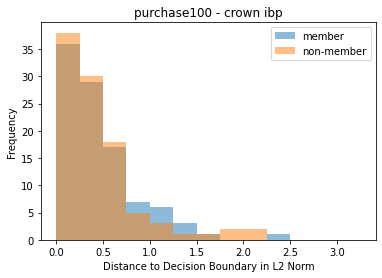

In [13]:
from matplotlib import pyplot as plt
import pandas as pd

def dist(x, x_adv):
    return np.linalg.norm(np.reshape(x_adv - x, [-1]))

dist_train = [dist(x, xa) for (x, xa) in zip(x_target_train[train_idx], x_adv_train)]
dist_test = [dist(x, xa) for (x, xa) in zip(x_target_test[test_idx], x_adv_test)]
print(pd.DataFrame(np.array(dist_train)).describe())
print(pd.DataFrame(np.array(dist_test)).describe())

bins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25]

plt.hist(dist_train, bins, alpha=0.5, label='member')
plt.hist(dist_test, bins, alpha=0.5, label='non-member')
plt.legend(loc='upper right')
plt.title(f"{dataset} - {algorithm}")
plt.xlabel("Distance to Decision Boundary in L2 Norm")
plt.ylabel("Frequency")
plt.show()

### 6. Measure the Advantage of An Adversary in Label-Only Membership Inference Attacks

[0.   0.   0.05 0.05 0.06 0.06 0.07 0.07 0.08 0.08 0.09 0.09 0.13 0.13
 0.14 0.14 0.17 0.17 0.18 0.18 0.21 0.21 0.22 0.22 0.23 0.23 0.26 0.26
 0.3  0.3  0.32 0.32 0.33 0.33 0.37 0.37 0.39 0.39 0.4  0.4  0.41 0.41
 0.43 0.43 0.44 0.44 0.45 0.45 0.47 0.47 0.48 0.48 0.51 0.51 0.53 0.53
 0.54 0.54 0.55 0.55 0.61 0.61 0.62 0.62 0.63 0.63 0.64 0.64 0.65 0.65
 0.67 0.67 0.69 0.69 0.71 0.71 0.72 0.72 0.74 0.74 0.76 0.76 0.77 0.77
 0.81 0.81 0.83 0.83 0.84 0.84 0.86 0.86 0.87 0.87 0.89 0.89 0.9  0.9
 0.92 0.92 0.93 0.93 0.95 0.95 0.97 0.97 0.98 0.98 1.  ]
[0.   0.01 0.01 0.05 0.05 0.06 0.06 0.07 0.07 0.11 0.11 0.12 0.12 0.14
 0.14 0.19 0.19 0.23 0.23 0.27 0.27 0.31 0.31 0.32 0.32 0.33 0.33 0.34
 0.34 0.35 0.35 0.36 0.36 0.39 0.39 0.41 0.41 0.44 0.44 0.45 0.45 0.49
 0.49 0.51 0.51 0.52 0.52 0.53 0.53 0.54 0.54 0.55 0.55 0.56 0.56 0.57
 0.57 0.58 0.58 0.59 0.59 0.62 0.62 0.64 0.64 0.65 0.65 0.66 0.66 0.67
 0.67 0.73 0.73 0.75 0.75 0.76 0.76 0.77 0.77 0.79 0.79 0.8  0.8  0.81
 0.81 0.82 0.82 0.83 

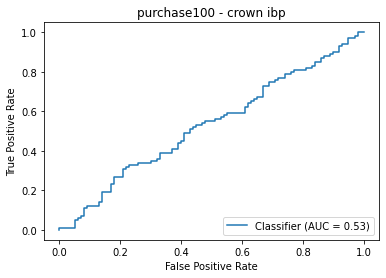

In [14]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, thresholds = roc_curve(
    np.concatenate((np.ones(len(dist_train)), np.zeros(len(dist_test)))),
    dist_train + dist_test
)
print(fpr)
print(tpr)
print(thresholds)

RocCurveDisplay.from_predictions(
    np.concatenate((np.ones(len(dist_train)), np.zeros(len(dist_test)))),
    dist_train + dist_test
)
plt.title(f"{dataset} - {algorithm}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### 7. Measure the Statistical Relationship between Distance to Decision Boundary and Confidence Scores

In [9]:
from scipy.stats.stats import pearsonr
import scipy

confidence_train = [np.amax(scipy.special.softmax(p)) for p in art_classifier.predict(x_target_train[train_idx])]
confidence_test = [np.amax(scipy.special.softmax(p)) for p in art_classifier.predict(x_target_test[test_idx])]

corr, pvalue = pearsonr(confidence_train, dist_train)
print("train correlation ", corr, pvalue)
corr, pvalue = pearsonr(confidence_test, dist_test)
print("test correlation ", corr, pvalue)

train correlation  0.35194888399988566 0.00032960987515535283
test correlation  0.2594928191765802 0.009130616285928192
